In [1]:
import re
import pandas as pd
import numpy as np
from helper_functions.preprocessing import no_path_find_pre
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator #What do these do?
from matplotlib import cm
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

In [2]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?

#plt.style.use('/data/user/boiger_r/aerosol/aerosol_code1/postprocessing/plot_style.txt')
#mpl.rcParams['axes.titlesize'] = 11

# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

In [3]:
plot_dir ='/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_preprocessing'




In [4]:
file1 = '/data/user/boiger_r/aerosol/aerosol_data/raw_data_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData/training_dataset.hdf5'


In [5]:
dvar_test1 = pd.read_hdf(file1,key = 'dvar')
qoi_test1 = pd.read_hdf(file1,key = 'qoi')

In [6]:
qoi_test1

P11_0.450_0  P11_0.450_1  P11_0.450_2  P11_0.450_3  P11_0.450_4  \
75220   -13.707913   -13.801805   -14.065062   -14.457432   -14.937166   
48955   -13.630942   -13.672276   -13.792869   -13.983503   -14.232375   
44966   -14.555980   -14.696603   -15.083382   -15.643851   -16.306838   
13568   -14.404892   -14.461335   -14.624563   -14.879432   -15.207300   
92727   -14.098776   -14.114860   -14.162419   -14.239532   -14.343431   
...            ...          ...          ...          ...          ...   
6265    -13.647711   -13.801509   -14.218244   -14.809979   -15.494942   
54886   -13.505822   -13.606466   -13.888415   -14.307367   -14.816869   
76820   -13.693647   -13.808138   -14.127513   -14.599787   -15.171353   
860     -13.480110   -13.553300   -13.761591   -14.078929   -14.475571   
15795   -14.894291   -14.896499   -14.903153   -14.914223   -14.929612   

       P11_0.450_5  P11_0.450_6  P11_0.450_7  P11_0.450_8  P11_0.450_9  ...  \
75220   -15.468535   -16.020062   -16.563617   -17.071777   -17.527167  ...   
48955   -14.527576   -14.857960   -15.213270   -15.584179   -15.961263  ...   
44966   -17.009255   -17.688553   -18.293079   -18.784740   -19.181165  ...   
13568   -15.589882   -16.010228   -16.452241   -16.900336   -17.338469  ...   
92727   -14.470900   -14.618629   -14.783410   -14.962190   -15.152139  ...   
...            ...          ...          ...          ...          ...  ...   
6265    -16.202859   -16.866396   -17.436133   -17.883486   -18.233952  ...   
54886   -15.375206   -15.942799   -16.481910   -16.957402   -17.350742  ...   
76820   -15.794636   -16.423887   -17.016866   -17.534643   -17.967251  ...   
860     -14.924143   -15.399427   -15.877269   -16.334040   -16.748362  ...   
15795   -14.949242   -14.973077   -15.000956   -15.032771   -15.068359  ...   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
75220      -0.031001      -0.014855       0.006798       0.030019   
48955      -0.148830      -0.152140      -0.146200      -0.127300   
44966      -0.010409      -0.000052       0.010780       0.019908   
13568      -0.251250      -0.233550      -0.203950      -0.163680   
92727      -0.195960      -0.191970      -0.176940      -0.151570   
...              ...            ...            ...            ...   
6265        0.278290       0.247170       0.199940       0.136720   
54886       0.114640       0.080483       0.034745      -0.023130   
76820      -0.000352       0.004386       0.008310       0.010819   
860         0.052233       0.022388      -0.012821      -0.050014   
15795      -0.023846      -0.019659      -0.015766      -0.012222   

       P12_0.630_174  P12_0.630_175  P12_0.630_176  P12_0.630_177  \
75220       0.048416       0.055631       0.049621       0.034447   
48955      -0.096479      -0.062128      -0.033933      -0.015671   
44966       0.025257       0.025678       0.021539       0.014613   
13568      -0.118790      -0.077411      -0.045047      -0.022863   
92727      -0.119290      -0.085368      -0.054698      -0.030302   
...              ...            ...            ...            ...   
6265        0.055135      -0.044819      -0.148750      -0.197960   
54886      -0.090873      -0.157220      -0.194410      -0.170840   
76820       0.011585       0.010644       0.008394       0.005495   
860        -0.083119      -0.101940      -0.096180      -0.067319   
15795      -0.009072      -0.006352      -0.004092      -0.002313   

       P12_0.630_178  P12_0.630_179  
75220       0.017333       0.004619  
48955      -0.005770      -0.001260  
44966       0.007336       0.001964  
13568      -0.009290      -0.002187  
92727      -0.013200      -0.003248  
...              ...            ...  
6265       -0.136530      -0.039493  
54886      -0.096727      -0.026635  
76820       0.002707       0.000718  
860        -0.032513      -0.008221  
15795      -0.001031      -0.000258  

[80000 rows x 1077 columns]

In [7]:
#Separate training data P11-P12
obs_532 = qoi_test1.loc[:, list(qoi_test1.filter(regex='0.532', axis=1))] #.to_numpy()

P_11_column_names = list(filter(re.compile(".*P11").match, obs_532.columns))
P_12_column_names = list(filter(re.compile(".*P12").match, obs_532.columns))

obs_532_P11 = obs_532[P_11_column_names]
obs_532_P12 = obs_532[P_12_column_names]

In [8]:
obs_532_P12.reset_index(drop=True, inplace=True)
obs_532_P12

P12_0.532_1  P12_0.532_2  P12_0.532_3  P12_0.532_4  P12_0.532_5  \
0         0.000142     0.000554     0.001220     0.002170     0.003501   
1        -0.000036    -0.000141    -0.000313    -0.000539    -0.000801   
2         0.000107     0.000421     0.000975     0.001922     0.003610   
3         0.000043     0.000172     0.000391     0.000721     0.001216   
4        -0.000025    -0.000099    -0.000229    -0.000419    -0.000677   
...            ...          ...          ...          ...          ...   
79995    -0.000189    -0.000705    -0.001399    -0.001951    -0.001729   
79996    -0.000173    -0.000661    -0.001380    -0.002176    -0.002773   
79997     0.000170     0.000668     0.001510     0.002801     0.004789   
79998    -0.000146    -0.000569    -0.001223    -0.002036    -0.002887   
79999     0.000044     0.000175     0.000393     0.000699     0.001090   

       P12_0.532_6  P12_0.532_7  P12_0.532_8  P12_0.532_9  P12_0.532_10  ...  \
0         0.005377     0.008054     0.011914     0.017321      0.023936  ...   
1        -0.001061    -0.001257    -0.001290    -0.001010     -0.000212  ...   
2         0.006575     0.011635     0.019197     0.030094      0.041071  ...   
3         0.001978     0.003166     0.005046     0.007924      0.012208  ...   
4        -0.001016    -0.001446    -0.001982    -0.002639     -0.003433  ...   
...            ...          ...          ...          ...           ...  ...   
79995     0.000315     0.005293     0.013492     0.024355      0.035015  ...   
79996    -0.002683    -0.001237     0.002248     0.008080      0.015710  ...   
79997     0.007856     0.012576     0.019538     0.029439      0.040433  ...   
79998    -0.003565    -0.003739    -0.003002    -0.000897      0.002755  ...   
79999     0.001568     0.002130     0.002776     0.003505      0.004316  ...   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0          -0.003067       0.002754       0.009301       0.015109   
1          -0.128100      -0.113180      -0.090782      -0.062883   
2          -0.001942       0.002760       0.007993       0.012534   
3          -0.065903      -0.047960      -0.030591      -0.015808   
4          -0.146950      -0.139190      -0.123780      -0.101960   
...              ...            ...            ...            ...   
79995       0.359830       0.334580       0.286150       0.219760   
79996       0.231120       0.203070       0.158400       0.096425   
79997       0.006549       0.007458       0.008161       0.008371   
79998       0.166710       0.128810       0.083812       0.035597   
79999      -0.040959      -0.033566      -0.026757      -0.020618   

       P12_0.532_174  P12_0.532_175  P12_0.532_176  P12_0.532_177  \
0           0.018688       0.019062       0.016218       0.011194   
1          -0.035068      -0.013902      -0.002225       0.001780   
2           0.015229       0.015374       0.013009       0.008961   
3          -0.005084       0.001137       0.003482       0.003245   
4          -0.076863      -0.052479      -0.032023      -0.016933   
...              ...            ...            ...            ...   
79995       0.130320       0.018300      -0.112900      -0.210690   
79996       0.013891      -0.085484      -0.180030      -0.210780   
79997       0.007916       0.006789       0.005151       0.003301   
79998      -0.012336      -0.052951      -0.073035      -0.062251   
79999      -0.015217      -0.010599      -0.006796      -0.003827   

       P12_0.532_178  P12_0.532_179  
0           0.005707       0.001543  
1           0.001716       0.000560  
2           0.004568       0.001236  
3           0.001863       0.000529  
4          -0.007094      -0.001700  
...              ...            ...  
79995      -0.169820      -0.051203  
79996      -0.138590      -0.039943  
79997       0.001608       0.000425  
79998      -0.032691      -0.008394  
79999      -0.001702      -0.000426  

[80000 rows x 179 columns]

In [9]:
scaler3 = StandardScaler()
obs_532_P11_sts = scaler3.fit_transform(np.exp(obs_532_P11))
obs_532_P11_sts_log = scaler3.fit_transform(obs_532_P11)
obs_532_P12_sts = scaler3.fit_transform(obs_532_P12)


In [10]:
obs_532_P12_sts

array([[ 1.58967528,  1.57944409,  1.56075945, ...,  0.47443071,
         0.34693057,  0.28715897],
       [-0.31525514, -0.3300908 , -0.36032336, ...,  0.25726427,
         0.19612671,  0.16128121],
       [ 1.20849877,  1.21319844,  1.2536098 , ...,  0.42291764,
         0.30389233,  0.24780537],
       ...,
       [ 1.8833406 ,  1.89341207,  1.92385931, ...,  0.29235065,
         0.19206094,  0.1439605 ],
       [-1.49835728, -1.50290606, -1.50071011, ..., -1.21979601,
        -1.10397187, -0.98460857],
       [ 0.53459838,  0.53880564,  0.52491587, ...,  0.12791988,
         0.06697799,  0.03515516]])

In [11]:
obs_532_P11_sts

array([[ 0.84988192,  0.84782588,  0.80982062, ..., -0.4010654 ,
        -0.4018044 , -0.40455977],
       [ 1.0628212 ,  1.16171435,  1.43442031, ..., -0.26061246,
        -0.25350821, -0.25087205],
       [-0.4251268 , -0.48231052, -0.64605597, ..., -0.41425414,
        -0.41453557, -0.41700203],
       ...,
       [ 0.85710599,  0.82135095,  0.68785013, ..., -0.3987376 ,
        -0.39968815, -0.40259839],
       [ 1.40815795,  1.46018776,  1.56987913, ...,  0.34781874,
         0.36987985,  0.4246788 ],
       [-0.68138422, -0.66279281, -0.58548437, ...,  0.11645869,
         0.09497275,  0.07848367]])

In [12]:
obs_532_P11_sts_log

array([[ 0.8060328 ,  0.79230954,  0.74650124, ..., -0.9262843 ,
        -0.94162175, -0.95461557],
       [ 0.88947696,  0.91220874,  0.97193336, ...,  0.26077924,
         0.28603202,  0.29841259],
       [ 0.02583979, -0.02883877, -0.1876718 , ..., -1.5560604 ,
        -1.56780551, -1.5778007 ],
       ...,
       [ 0.80899311,  0.7814426 ,  0.69543137, ..., -0.8629171 ,
        -0.88200949, -0.89815061],
       [ 1.0103464 ,  1.01331298,  1.01445953, ...,  1.14831967,
         1.16241066,  1.19509311],
       [-0.26459211, -0.2293264 , -0.12356573, ...,  0.94567659,
         0.92134612,  0.89979403]])

In [13]:
# Samples to plot
sample_range = range(1,20)
sample_fac = obs_532_P11.shape[0]//len(sample_range)

# Plot styling
plt.style.use('/data/user/boiger_r/aerosol/aerosol_code1/postprocessing/PLOTS_PAPER/plot_style.txt')
scat_style = {'s': 4.5, 'marker': 'x', 'alpha': 0.6}

# Ticks
loc = plticker.MultipleLocator(base=30.0)

# Colors
cmap = cm.get_cmap('magma')
colors = cmap(np.linspace(0, 1, len(sample_range)))
# Explicit
# colors = [(0.1, 0, 0.9, 0.6), (0.5, 0, 0.5, 0.6), (0.9, 0, 0.1, 0.6)]

In [14]:
column_P11 = []
for column_names in obs_532_P11.columns:
    column_P11.append(int(column_names[10:]))
column_P12 = []
for column_names in obs_532_P12.columns:
    column_P12.append(int(column_names[10:]))

In [15]:
colors = ['tab:cyan', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:blue']


In [16]:
sample_range

range(1, 20)

1
4211
2
8421
3
12631
4
16841
5
21051
6
25261
7
29471
8
33681
9
37891
10
42101
11
12
13
14
15
16
17
18
19


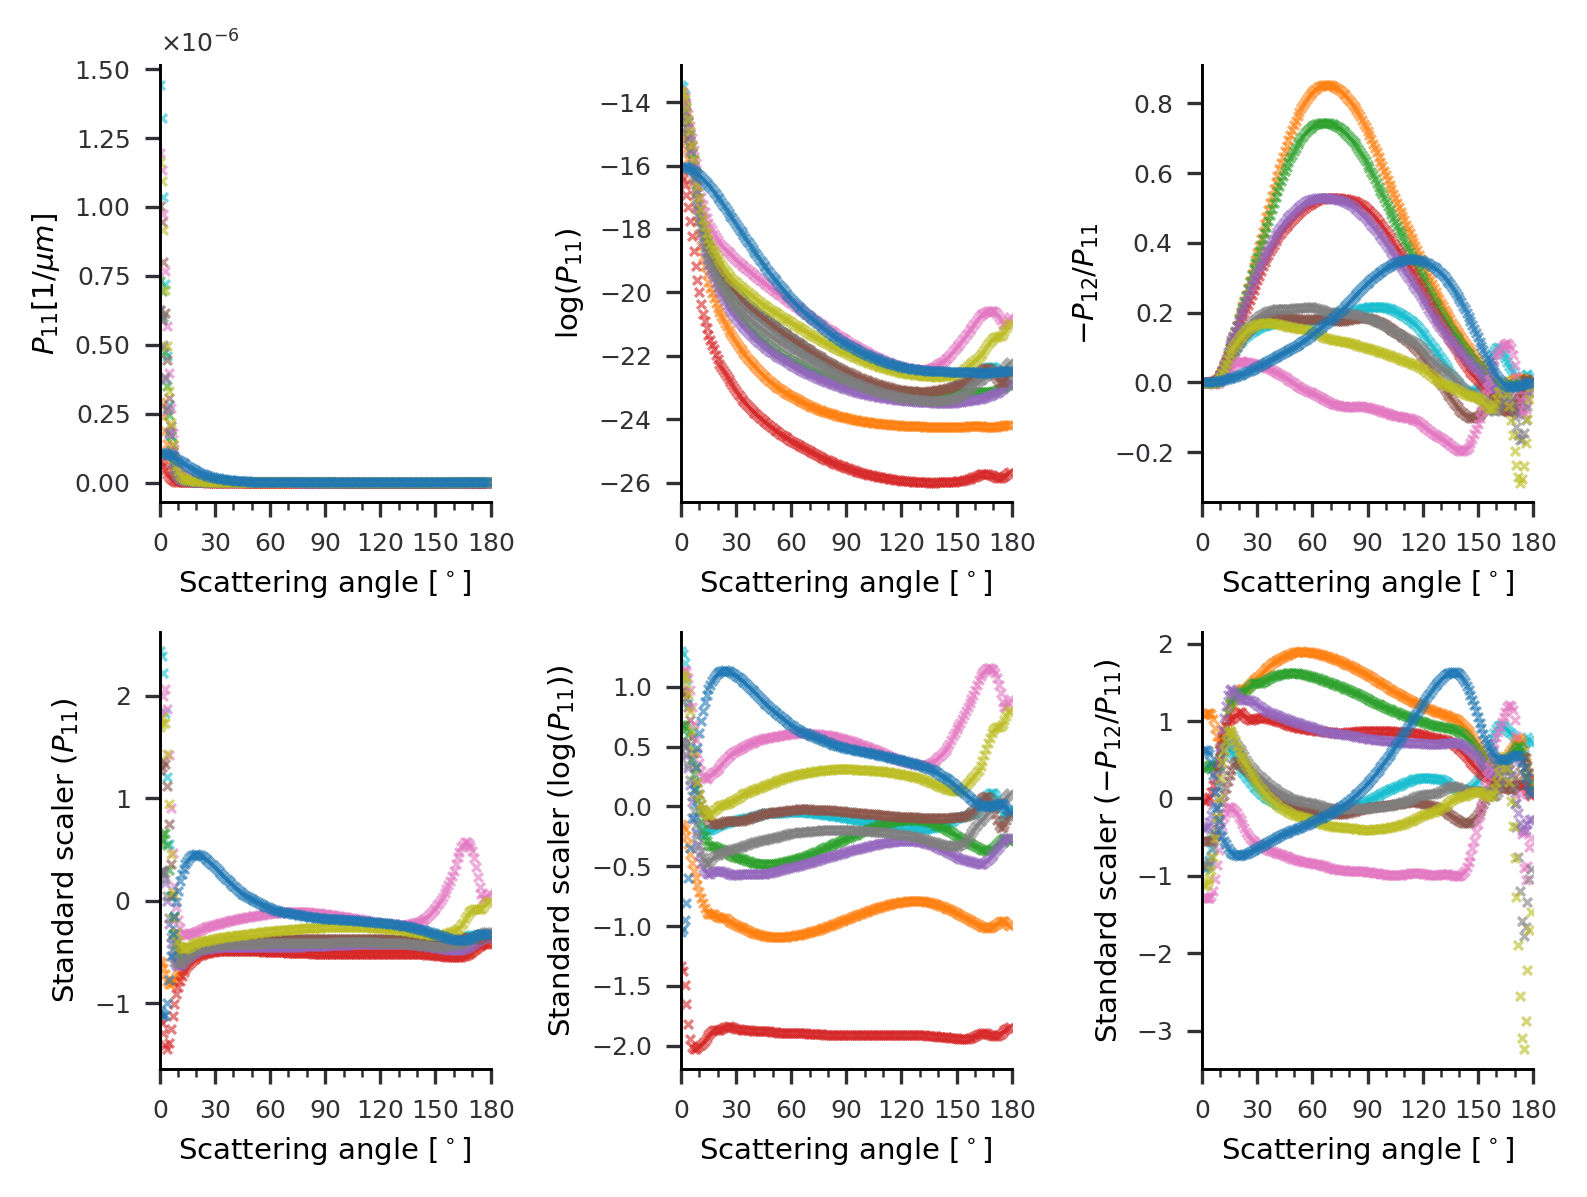

In [17]:
#figsize = set_size(textwidth, subplots=(2, 3))#, scale_factor=1.2, rescale_height=1.5)

fig = plt.figure(figsize=(5.3,4))
#fig.tight_layout(h_pad=10)
ax1 = fig.add_subplot(231)
ax3 = fig.add_subplot(232)
ax4 = fig.add_subplot(233)
ax5 = fig.add_subplot(234)
ax6 = fig.add_subplot(235)
ax7 = fig.add_subplot(236)
#ax1.set_title("$\operatorname{Unscaled}$")
for i in sample_range:
    print(i)
    if i <= 10:
        print(1+i*sample_fac)
        ax1.scatter(column_P11, np.exp(obs_532_P11.iloc[1+i*sample_fac, :]), label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax3.scatter(column_P11, (obs_532_P11.iloc[1+i*sample_fac, :]), label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax4.scatter(column_P12, obs_532_P12.iloc[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax5.scatter(column_P11, obs_532_P11_sts[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax6.scatter(column_P11, obs_532_P11_sts_log[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)

        
        
        
        ax7.scatter(column_P12, obs_532_P12_sts[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)

ax1.set_xlabel("Scattering angle $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.set_ylabel("$P_{11} [1 / \mu m]$")
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)
#ax1.grid('on', alpha=.2, which='major')

#ax3.set_title("$g(y) = \log(y)$")
ax3.set_xlabel("Scattering angle $[^\circ]$")
ax3.locator_params(axis = 'x', tight=True, nbins=40)
ax3.set_ylabel("$\log (P_{11})$")
ax3.xaxis.set_major_locator(loc)
ax3.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax3.set_xlim(0, 180)

#ax1.set_title("$\operatorname{Unscaled}$")
ax4.set_xlabel("Scattering angle $[^\circ]$")
ax4.locator_params(axis = 'x', tight=True, nbins=40)
ax4.set_ylabel("$-P_{12}/P_{11}$")
ax4.xaxis.set_major_locator(loc)
ax4.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax4.set_xlim(0, 180)
# Legend
#ax1.legend(bbox_to_anchor=(1.1,0.5), loc="upper left")

#ax2.set_title("$g(y) = \operatorname{StandardScaler}(y)$")
ax5.set_xlabel("Scattering angle $[^\circ]$")
ax5.locator_params(axis = 'x', tight=True, nbins=40)
ax5.set_ylabel("Standard scaler $(P_{11})$")
ax5.xaxis.set_major_locator(loc)
ax5.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax5.set_xlim(0, 180)

#ax1.set_title("$g(y)= \operatorname{StandardScaler}\circ\log(y)$")
ax6.set_xlabel("Scattering angle $[^\circ]$")
ax6.locator_params(axis = 'x', tight=True, nbins=40)
ax6.set_ylabel("Standard scaler $(\log(P_{11}))$")
ax6.xaxis.set_major_locator(loc)
ax6.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax6.set_xlim(0, 180)

#ax3.set_title("$g(y)=\operatorname{StandardScaler}(y)$")

ax7.set_xlabel("Scattering angle $[^\circ]$")
ax7.locator_params(axis = 'x', tight=True, nbins=40)
ax7.set_ylabel("Standard scaler $(-P_{12}/P_{11})$")
ax7.xaxis.set_major_locator(loc)
ax7.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax7.set_xlim(0, 180)
fig.tight_layout()#h_pad=2, w_pad=0.5)
if save_to_file:
    fig.savefig(f'{plot_dir}/preprocessing_unimodal.pdf', dpi=1000)
plt.show()

In [18]:
save_to_file

True

In [19]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_preprocessing'

1
4211
2
8421
3
12631
4
16841
5
21051
6
25261
7
29471
8
33681
9
37891
10
42101
11
12
13
14
15
16
17
18
19


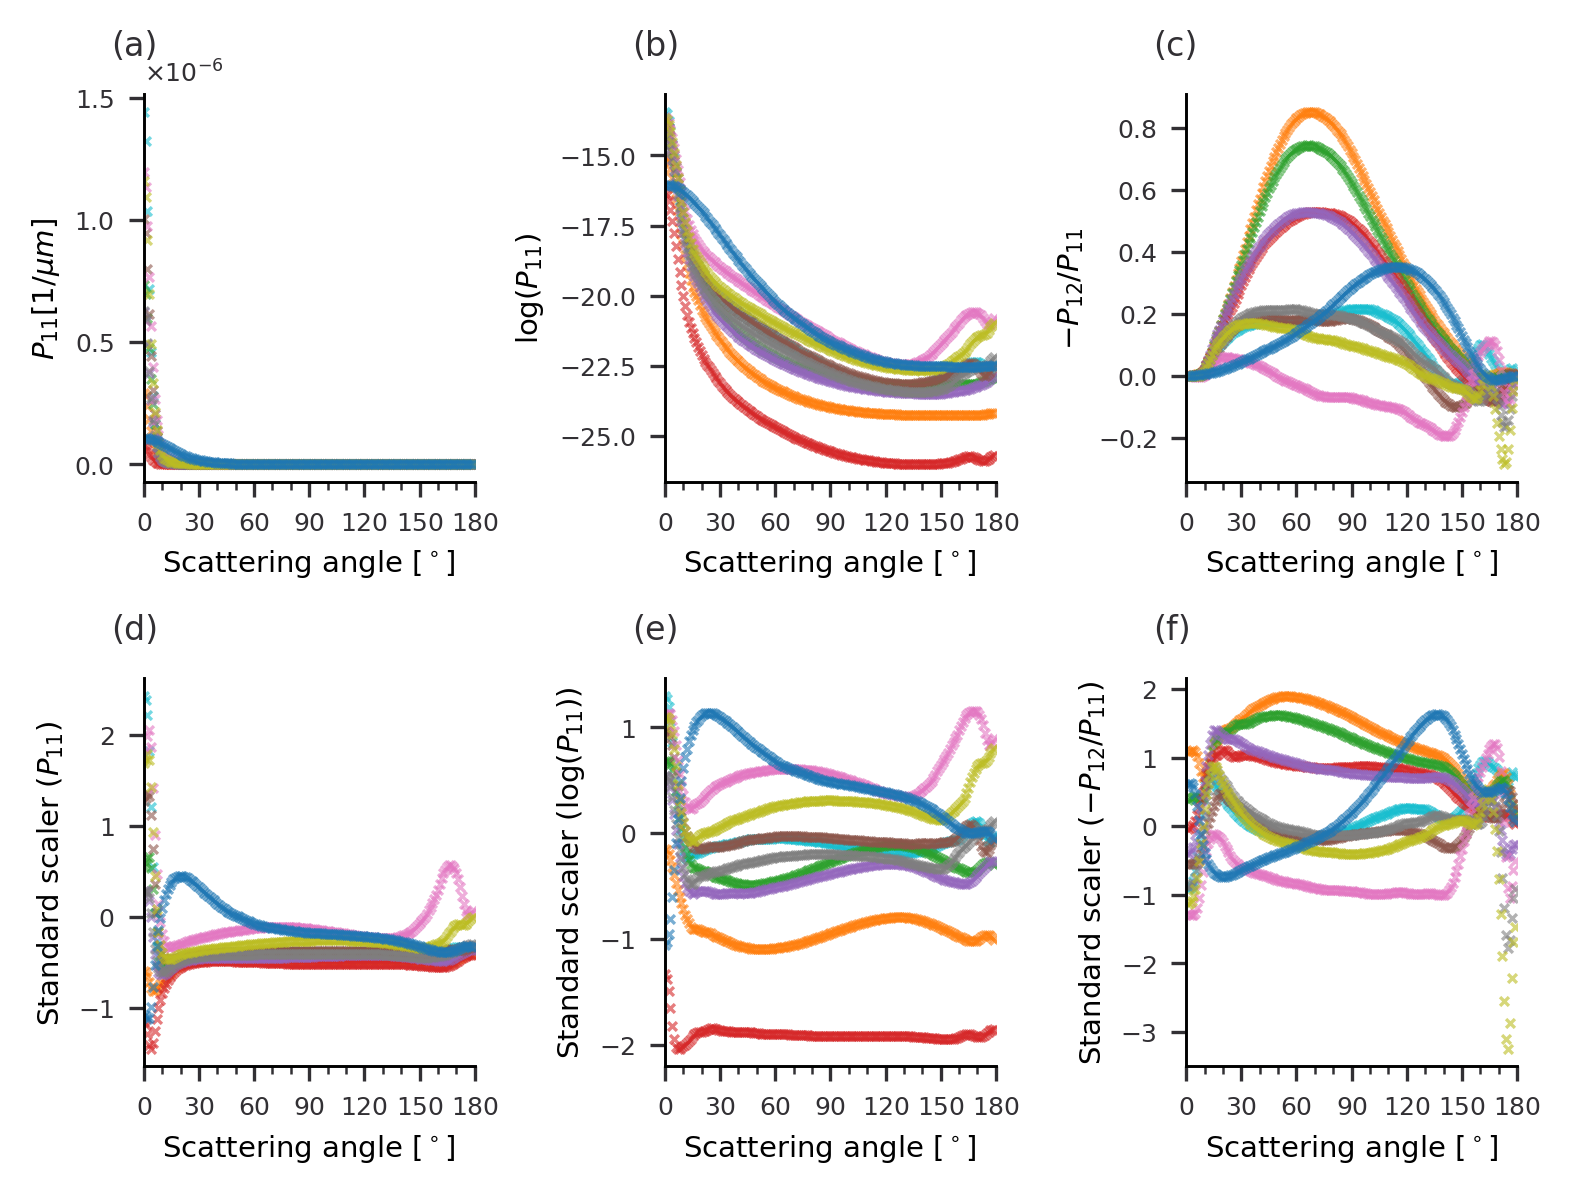

In [28]:
#figsize = set_size(textwidth, subplots=(2, 3))#, scale_factor=1.2, rescale_height=1.5)
sizel= 8
fig = plt.figure(figsize=(5.3,4))
#fig.tight_layout(h_pad=10)
ax1 = fig.add_subplot(231)
ax3 = fig.add_subplot(232)
ax4 = fig.add_subplot(233)
ax5 = fig.add_subplot(234)
ax6 = fig.add_subplot(235)
ax7 = fig.add_subplot(236)
#ax1.set_title("$\operatorname{Unscaled}$")
for i in sample_range:
    print(i)
    if i <= 10:
        print(1+i*sample_fac)
        ax1.scatter(column_P11, np.exp(obs_532_P11.iloc[1+i*sample_fac, :]), label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax3.scatter(column_P11, (obs_532_P11.iloc[1+i*sample_fac, :]), label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax4.scatter(column_P12, obs_532_P12.iloc[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax5.scatter(column_P11, obs_532_P11_sts[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)
        ax6.scatter(column_P11, obs_532_P11_sts_log[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)

        
        
        
        ax7.scatter(column_P12, obs_532_P12_sts[1+i*sample_fac, :], label=f'{i*sample_fac}', color=colors[i-1], **scat_style)

ax1.set_xlabel("Scattering angle $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.set_ylabel("$P_{11} [1 / \mu m]$")
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)

ax1.text(-0.1, 1.1,'(a)' , transform=ax1.transAxes, size=sizel)
#ax1.grid('on', alpha=.2, which='major')

#ax3.set_title("$g(y) = \log(y)$")
ax3.set_xlabel("Scattering angle $[^\circ]$")
ax3.locator_params(axis = 'x', tight=True, nbins=40)
ax3.set_ylabel("$\log (P_{11})$")
ax3.xaxis.set_major_locator(loc)
ax3.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax3.set_xlim(0, 180)
ax3.text(-0.1, 1.1,'(b)' , transform=ax3.transAxes, size=sizel)

#ax1.set_title("$\operatorname{Unscaled}$")
ax4.set_xlabel("Scattering angle $[^\circ]$")
ax4.locator_params(axis = 'x', tight=True, nbins=40)
ax4.set_ylabel("$-P_{12}/P_{11}$")
ax4.xaxis.set_major_locator(loc)
ax4.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax4.set_xlim(0, 180)
ax4.text(-0.1, 1.1,'(c)' , transform=ax4.transAxes, size=sizel)

# Legend
#ax1.legend(bbox_to_anchor=(1.1,0.5), loc="upper left")

#ax2.set_title("$g(y) = \operatorname{StandardScaler}(y)$")
ax5.set_xlabel("Scattering angle $[^\circ]$")
ax5.locator_params(axis = 'x', tight=True, nbins=40)
ax5.set_ylabel("Standard scaler $(P_{11})$")
ax5.xaxis.set_major_locator(loc)
ax5.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax5.set_xlim(0, 180)
ax5.text(-0.1, 1.1,'(d)' , transform=ax5.transAxes, size=sizel)


#ax1.set_title("$g(y)= \operatorname{StandardScaler}\circ\log(y)$")
ax6.set_xlabel("Scattering angle $[^\circ]$")
ax6.locator_params(axis = 'x', tight=True, nbins=40)
ax6.set_ylabel("Standard scaler $(\log(P_{11}))$")
ax6.xaxis.set_major_locator(loc)
ax6.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax6.set_xlim(0, 180)
ax6.text(-0.1, 1.1,'(e)' , transform=ax6.transAxes, size=sizel)


#ax3.set_title("$g(y)=\operatorname{StandardScaler}(y)$")

ax7.set_xlabel("Scattering angle $[^\circ]$")
ax7.locator_params(axis = 'x', tight=True, nbins=40)
ax7.set_ylabel("Standard scaler $(-P_{12}/P_{11})$")
ax7.xaxis.set_major_locator(loc)
ax7.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax7.set_xlim(0, 180)
ax7.text(-0.1, 1.1,'(f)' , transform=ax7.transAxes, size=sizel)

fig.tight_layout()#h_pad=2, w_pad=0.5)
if save_to_file:
    fig.savefig(f'{plot_dir}/preprocessing_unimodal_labels.pdf', dpi=1000)
plt.show()